In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Rows: 200 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): X3, X4, X5, X7, X11, X12, X13, X14, X15, X16, X17, X18, X19, X26, ...
dbl (13): X1, X2, X6, X8, X9, X10, X20, X21, X22, X23, X24, X25, X28

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


bp_diastolic,bp_limit,sg,al,class,rbc,su,pc,pcc,ba,⋯,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,⋯,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,⋯,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,⋯,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,⋯,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,⋯,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74
1,1,1.009 - 1.011,2 - 2,ckd,0,2 - 2,0,0,0,⋯,1,1,0,0,0,0,< 26.6175,s4,1,≥ 74


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



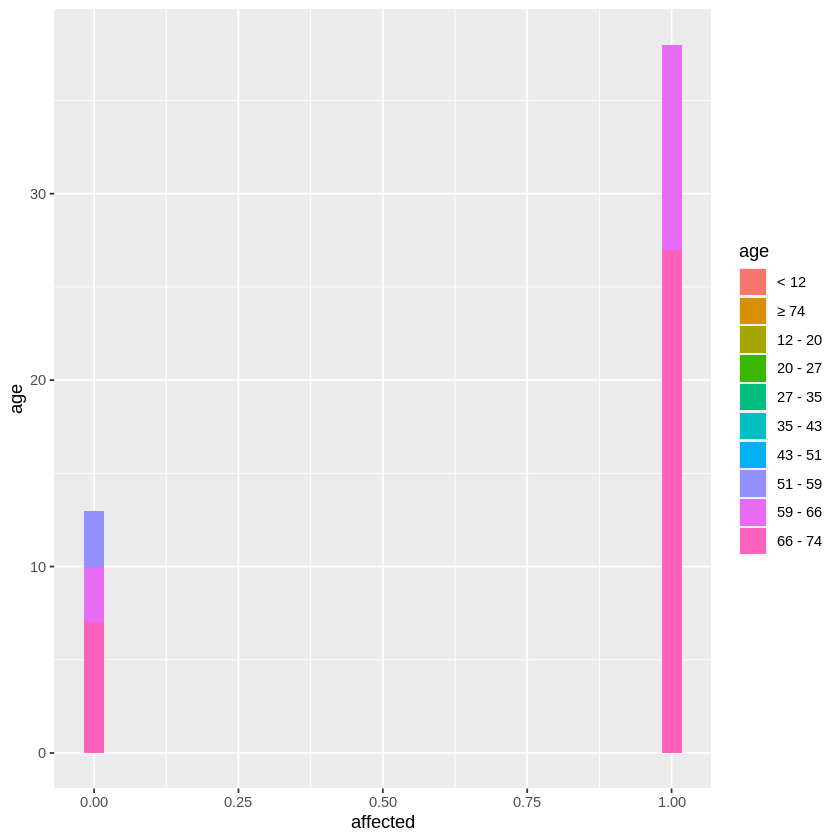

In [9]:
ckd_data_unnamed <- read_csv("ckd-dataset.csv", skip = 3, col_names = FALSE)

ckd_data <- rename(ckd_data_unnamed,
                   bp_diastolic = X1, 
                   bp_limit = X2, 
                   sg = X3,
                   al = X4, 
                   class = X5, 
                   rbc = X6,
                   su = X7,
                   pc = X8,
                   pcc = X9,
                   ba = X10,
                   bgr = X11, 
                   bu = X12,
                   sod = X13, 
                   sc = X14, 
                   pot = X15,
                   hemo = X16,
                   pcv = X17,
                   rbcc = X18,
                   wbcc = X19,
                   htn = X20,
                   dm = X21,
                   cad = X22,
                   appet = X23,
                   pe = X24,
                   ane = X25,
                   grf = X26,
                   stage = X27,
                   affected = X28,
                   age = X29)
                
                   
ckd_data


bar_plot <- ckd_data |>
   ggplot(aes(x = affected, fill = age)) + 
   geom_histogram(position = 'identity') + 
   xlab("affected") +
   ylab("age") 
bar_plot


